<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_21_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción meteorológica con gráfico
Los meteorólogos recopilan datos de humedad y presión atmosférica para predecir si lloverá o no.

Tu misión es construir un sistema inteligente que pueda predecir la probabilidad de lluvia utilizando un modelo de regresión logística.

## 🧩 Pasos a seguir

### Crea la clase WeatherRecord: Representará un registro de condiciones meteorológicas
  + Atributos:
    + Humedad (%)
    + Presión atmosférica (hPa)
    + Lluvia (1 si llovió, 0 si no)

<br>
<br>

### Crea la clase WeatherDataGenerator:
Deberá generar registros sintéticos simulando que:
  + Alta humedad y baja presión aumentan la probabilidad de lluvia.
  + Baja humedad y alta presión indican que no lloverá.
<br>
<br>

### Crea la clase WeatherRainClassifier: Entrena un modelo de regresión logística
  + Métodos:
    + Método fit(records) para entrenar.
    + Método predict(humidity, pressure) que devuelva 1 o 0.
    + Método get_model() para obtener el modelo scikit-learn (útil para visualización).
<br>
<br>

### Crea la clase WeatherPredictionExample:
Que haga lo siguiente:
  + Genere datos.
  + Entrene el modelo.
  + Haga una predicción para nuevas condiciones climáticas.
  + Muestre un gráfico con matplotlib diferenciando los casos de lluvia y no lluvia.



## 🎯 Ejemplo de uso
```python
example = WeatherRainPredictionExample()
example.run()
```

#### 📊 Salida esperada
```python
[[21  0]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60
 ```

#### 🔍 Predicción para condiciones nuevas:
```python
   Humedad: 80%
   Presión: 995 hPa
   ¿Lloverá?: Sí ☔
```

###Importación de librerias

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Creación de la clase WeatherRecord:

In [76]:
class WeatherRecord:
    """Representa un registro meteorológico con humedad, presión y lluvia.

    Almacena la humedad relativa, la presión atmosférica y un indicador
    binario de si llovió o no en un momento dado.
    """
    def __init__(self, humedad, presion, lluvia):
        """Inicializa un registro meteorológico.

        Args:
            humedad (float): Humedad relativa en porcentaje (0-100).
            presion (float): Presión atmosférica en hectopascales (hPa).
            lluvia (int): 1 si llovió, 0 si no llovió.

        Raises:
            ValueError: Si los valores de humedad, presión o lluvia
                están fuera de los rangos válidos.
        """
        if not 0 <= humedad <= 100:
            raise ValueError("La humedad debe estar entre  0 y  100.")
        if not 900 <= presion <= 1100:
            raise ValueError("La presión debe estar entre 900 y 1100 hPa.")
        if not isinstance(lluvia, int) or lluvia not in [0, 1]:
            raise ValueError("El valor de lluvia debe ser 0 o 1.")
        self.humedad = humedad
        self.presion = presion
        self.lluvia = lluvia

    def to_dict(self):
        """Devuelve un diccionario con los datos del registro."""
        return {
            'humedad': self.humedad,
            'presion': self.presion,
            'lluvia': self.lluvia
        }

    def __str__(self):
        """Devuelve una representación legible del registro."""
        return f"Humedad: {self.humedad}%, Presión: {self.presion} hPa, ¿Lloverá?: {'Sí' if self.lluvia else 'No'}"

#### Test de la clase WaetherRecord

In [77]:
# normal
record = WeatherRecord(80, 995, 1)
print(record)
print(record.to_dict())


Humedad: 80%, Presión: 995 hPa, ¿Lloverá?: Sí
{'humedad': 80, 'presion': 995, 'lluvia': 1}


In [78]:
# Sin humedad
record = WeatherRecord(0, 995, 1)

In [79]:
# mala humedad
record = WeatherRecord(-10, 995, 1)

ValueError: La humedad debe estar entre  0 y  100.

In [80]:
# mala humedad
record = WeatherRecord(180, 995, 1)

ValueError: La humedad debe estar entre  0 y  100.

### Creación de la clase WeatherDataGenerator

In [88]:
class WeatherDataGenerator:
    """Genera registros meteorológicos sintéticos.

    Crea una lista de objetos WeatherRecord con valores aleatorios
    de humedad, presión y una indicación de lluvia, simulando
    una probabilidad de lluvia dependiente de estos factores.

    La probabilidad de lluvia se calcula normalizando la humedad
    (entre 0 y 1) y la presión de forma inversa (también entre
    aproximadamente 1 y 0), multiplicando estos valores.
    Una humedad más alta y una presión más baja aumentan la
    probabilidad resultante.

    """
    _humedad_minima = 20
    _humedad_maxima = 80
    _presion_minima = 900
    _presion_maxima = 1100

    def __init__(self, num_records=100):
        """Inicializa el generador de datos meteorológicos.

        Args:
            num_records (int, optional): Número de registros a generar.
                Defaults to 100.
        """
        self.num_records = num_records
        self.records = []
        self._generate_data()

    def _generate_data(self):
        """Genera los datos meteorológicos sintéticos."""
        for _ in range(self.num_records):
            # Genera valorea aleatorios para humedad(h), presion(p)
            h = np.random.uniform(self._humedad_minima,
                                  self._humedad_maxima)
            p = np.random.uniform(self._presion_minima,
                                  self._presion_maxima)
            probab_lluvia = (h / 100) * (1 - (p - self._presion_minima) / 150)
            llovio = 1 if np.random.uniform() < probab_lluvia else 0
            self.records.append(WeatherRecord(h, p, llovio))

###3 Pruebas para la clase WeatherDataGenerator

In [81]:
datos_5 = WeatherDataGenerator(5)
for registro in datos_5.records:
  print(registro)
  print(registro.to_dict())

Humedad: 57.097773755106246%, Presión: 1076.1408269828883 hPa, ¿Lloverá?: No
{'humedad': 57.097773755106246, 'presion': 1076.1408269828883, 'lluvia': 0}
Humedad: 45.13524620236046%, Presión: 1096.601910432939 hPa, ¿Lloverá?: No
{'humedad': 45.13524620236046, 'presion': 1096.601910432939, 'lluvia': 0}
Humedad: 63.11533299184872%, Presión: 992.4259814317429 hPa, ¿Lloverá?: No
{'humedad': 63.11533299184872, 'presion': 992.4259814317429, 'lluvia': 0}
Humedad: 72.28870768989302%, Presión: 1094.4494397842773 hPa, ¿Lloverá?: No
{'humedad': 72.28870768989302, 'presion': 1094.4494397842773, 'lluvia': 0}
Humedad: 20.02917682646369%, Presión: 1055.3211427522099 hPa, ¿Lloverá?: No
{'humedad': 20.02917682646369, 'presion': 1055.3211427522099, 'lluvia': 0}


### Creación de la clase WeatherRainClassifier

In [ ]:
class WeatherRainClassifier:
    """Clasifica si lloverá basándose en humedad y presión.

    Utiliza regresión logística para predecir la probabilidad de
    lluvia a partir de datos de humedad y presión atmosférica.
    """
    def __init__(self):
        """Inicializa el clasificador con un modelo y un escalador."""
        self.model = LogisticRegression()
        self.scaler = StandardScaler()

    def fit(self, records):
        """Entrena el modelo con registros meteorológicos.

        Args:
            records (list): Una lista de objetos WeatherRecord
                con datos de humedad, presión y la variable objetivo (lluvia).
        """
        X = [[r.humedad, r.presion] for r in records]
        y = [r.lluvia for r in records]
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)

    def predict(self, h, p):
        """Predice si lloverá para una humedad y presión dadas.

        Args:
            h (float): Valor de humedad relativa.
            p (float): Valor de presión atmosférica.

        Returns:
            int: 1 si se predice lluvia, 0 si no se predice lluvia.
        """
        X_scaled = self.scaler.transform([[h, p]])
        return self.model.predict(X_scaled)[0]

    def get_model(self):
        """Devuelve el modelo de regresión logística entrenado.

        Returns:
            LogisticRegression: El modelo entrenado.
        """
        return self.model

#### Pruebas de la clase WeatherRainClassifier

In [82]:
wrc = WeatherRainClassifier()
datos = WeatherDataGenerator(100)
wrc.fit(datos.records)
print(wrc.predict(80, 995))



0


### Creación de la clase  WeatherPredictionExample

In [85]:
class WeatherPredictionExample:
    """Ejemplo de predicción de lluvia usando datos sintéticos.

    Crea datos meteorológicos sintéticos, entrena un clasificador
    de lluvia y realiza una predicción para condiciones dadas,
    mostrando también métricas de evaluación y una visualización.
    """
    def __init__(self):
        """Inicializa el ejemplo, creando el clasificador y los datos."""
        self.wrc = WeatherRainClassifier()
        self.data = WeatherDataGenerator(100)

    def run(self):
        """Ejecuta el ejemplo de predicción de lluvia.

        Entrena el modelo, realiza predicciones sobre los datos
        generados, muestra la matriz de confusión y el informe de
        clasificación, predice para una condición específica y
        visualiza los datos y las predicciones.
        """
        # entrena el modelo
        x = [r.humedad for r in self.data.records]
        y = [r.presion for r in self.data.records]
        z = [r.lluvia for r in self.data.records]
        self.wrc.fit(self.data.records)
        predicciones = self.wrc.model.predict(
            self.wrc.scaler.transform(list(zip(x, y)))
        )
        print(confusion_matrix(z, predicciones))
        print(classification_report(z, predicciones))
        h = 80
        p = 995
        lluvia = self.wrc.predict(h, p)
        print(f"Humedad: {h}%\nPresión: {p} hPa\n¿Lloverá?: {'Sí' if lluvia else 'No'}")

        fig = plt.figure(figsize=(8, 6))
        plt.scatter(x, y, c=z, cmap='coolwarm')
        plt.colorbar(label='0 = No llueve, 1 = llueve')
        plt.xlabel('Humedad relativa (%)')
        plt.ylabel('Presión atmosférica (hPa)')
        plt.title('Predicción de lluvia según condiciones meteorológicas')
        plt.show()



#### Pruebas para la clase  WeatherPredictionExample

[[85  0]
 [14  1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        85
           1       1.00      0.07      0.12        15

    accuracy                           0.86       100
   macro avg       0.93      0.53      0.52       100
weighted avg       0.88      0.86      0.80       100

Humedad: 80%
Presión: 995 hPa
¿Lloverá?: No


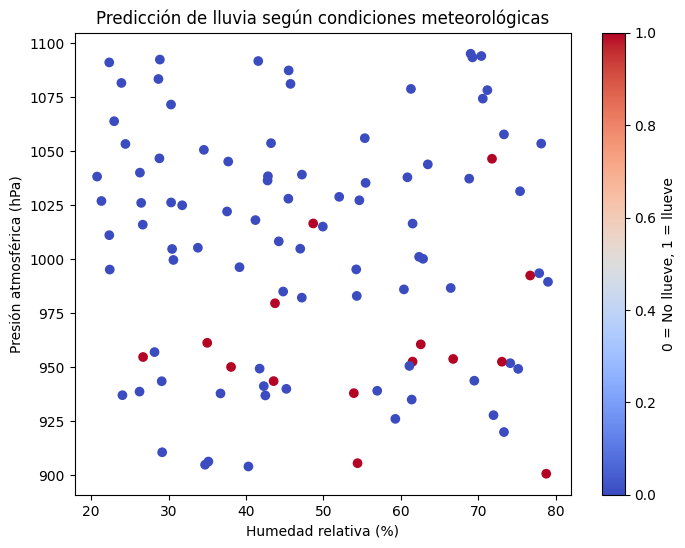

In [89]:
example = WeatherPredictionExample()
example.run()